# Data Visualization Project
# Question: Is there a correlation on the spread of Covid-19 with respect to age group and gender in Ontario?

Name: Daniel Kwan

Data from: https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [4]:
c19 = pd.read_csv("conposcovidloc.csv")
c19=c19[["ROW_ID","ACCURATE_EPISODE_DATE","Age_Group","CLIENT_GENDER",
         "CASE_ACQUISITIONINFO","RESOLVED","Reporting_PHU","Reporting_PHU_Address",
         "Reporting_PHU_City","Reporting_PHU_Postal_Code",
         "Reporting_PHU_Website"]] #latitude and longitude not useful for nowT
c19=c19.sort_values(by=['Age_Group'])

In [5]:
c19
#graph for time, death rate, recovery rate

,ROW_ID,ACCURATE_EPISODE_DATE,Age_Group,CLIENT_GENDER,CASE_ACQUISITIONINFO,RESOLVED,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website
1973,1974,2020-03-23,20s,FEMALE,Information pending,No,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...
2488,2489,2020-03-26,20s,FEMALE,Information pending,No,Wellington-Dufferin-Guelph Public Health,160 Chancellors Way,Guelph,N1G 0E1,www.wdgpublichealth.ca
1302,1303,2020-03-19,20s,MALE,Information pending,No,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/
1695,1696,2020-03-16,20s,FEMALE,Neither,Yes,Hamilton Public Health Services,"110 King St. West, 2nd Floor",Hamilton,L8P 4S6,www.hamilton.ca/publichealth
1694,1695,2020-03-15,20s,MALE,Neither,Yes,Hamilton Public Health Services,"110 King St. West, 2nd Floor",Hamilton,L8P 4S6,www.hamilton.ca/publichealth
...,...,...,...,...,...,...,...,...,...,...,...
1635,1636,2020-03-14,<20,FEMALE,Neither,Yes,Halton Region Health Department,1151 Bronte Road,Oakville,L6M 3Ll,www.halton.ca/For-Residents/Public-Health/
702,703,2020-03-26,<20,FEMALE,Information pending,No,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/
1082,1083,2020-03-13,<20,FEMALE,Travel-Related,Yes,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/
1318,1319,2020-03-29,Unknown,FEMALE,Information pending,No,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/


# Introduction 

We have selected our data set from https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario. This data set consists of daily snapshots of reported Coronavirus cases in Ontario over a three month period between 2020-01-21 to 2020-04-03. This data set has a total of 12 variables and has 2793 rows and 13 columns, 2 of which can be excluded since they are irrelevant for our data visualization. The variables used are listed below:

   - ACCURATE_EPISODE_DATE: is the date that the case was reported
   - Age_Group(Qualitative): age group of the affected victim
   - CLIENT_GENDER(Qualitative): the victim's gender
   - CASE_ACQUISITIONINFO(Qualitative): information on how the client was affected
   - RESOLVED(Qualitative): whether or not the patient has recovered
   - Reporting_PHU: public health unit name 
   - Reporting_PHU_Address: location of the public health unit
   - Reporting_PHU_City: the city in which it was reported
   - Postal Code
   - Reporting_PHU_Website
   - Reporting_PHU_Latitude
   - Reporting_PHU_Longitude

Aim: The main objective for this report is to identify if there is a correlation on the spread of Coronavirus with respect to age group and gender in Ontario. 





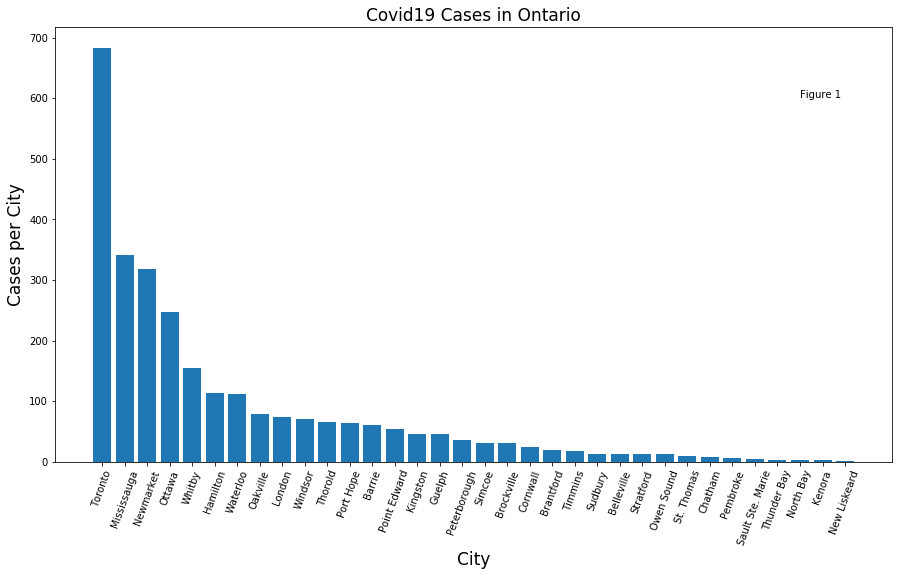

In [16]:
height = c19["Reporting_PHU_City"].value_counts()

bars = ["Toronto", "Mississauga", "Newmarket","Ottawa",  "Whitby", 
"Hamilton", "Waterloo","Oakville",  "London",   "Windsor",  
"Thorold",  "Port Hope","Barrie",   "Point Edward","Kingston", "Guelph",                 
"Peterborough","Simcoe",    "Brockville", "Cornwall",               
"Brantford","Timmins", "Sudbury",  "Belleville",  "Stratford","Owen Sound",             
"St. Thomas",  "Chatham",  "Pembroke", "Sault Ste. Marie",        
"Thunder Bay",  "North Bay",    "Kenora",   "New Liskeard"]
plt.figure(figsize=(15,8))
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
 
plt.xticks(y_pos, bars,rotation = 70)
plt.xlabel("City",fontsize=17)
plt.ylabel("Cases per City",fontsize=17)
plt.title("Covid19 Cases in Ontario",fontsize = 17)

plt.text(31,600, "Figure 1")
plt.show()

The above bar graph tells us that Toronto leads all cities in Ontario with 683 cases, almost double that of the second highest entry, Mississauga. On the other hand, New Liskeard has the least in the province, with only 2 reported cases. The high number of reported cases in Toronto maybe attributed to it being a major transportation hub, and also a major tourist attraction. Toronto's dense population might have also contributed to its fast rise.

Text(0.5, 0.98, 'Cases by age group')

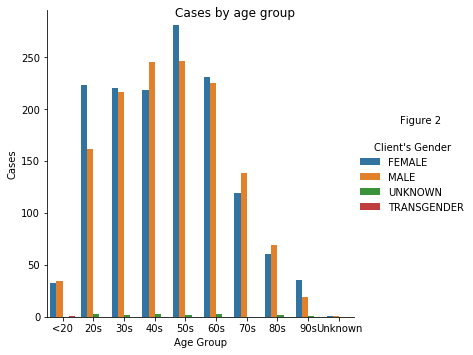

In [7]:
import seaborn as sns 

r"<20"< "20s" < "30s" < "40s" < "50s" < "60s" < "70s" < "80s" < "90s" < "Unknown" 

g = sns.catplot(x="Age_Group", order = [r"<20","20s", "30s" , "40s" , "50s", "60s" , "70s" ,"80s" , "90s" , "Unknown" ],
                hue="CLIENT_GENDER", data=c19,kind ="count", height=5)
g.set(xlabel='Age Group', ylabel = 'Cases')
g._legend.set_title('Client\'s Gender')
plt.text(11,186, "Figure 2")
g.fig.suptitle('Cases by age group')

The 20s to 50s age groups see the majority of cases, with 50s leading the highest number of cases for both male and female. Some age groups saw dramatic differences. The males in their 20s see almost 50 cases more than their female counterpart, and males in their 50s see almost 30 more cases than their female counterpart. Besides those 2 groups, the differences in other group are low, being around or less than 25. This is consistent with the fact that the majority of the population in Ontario are between 20 and 60, and travel more extensively than the other under 20 or retired age groups. 
We can also see that transgender's and unknown's numbers are very low. This may be attributed to the small size of non-binary gender population.

Text(3, 0.5, 'Figure 3')

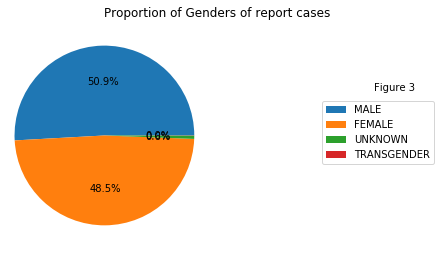

In [17]:
title = plt.title("Proportion of Genders of report cases")
title.set_ha("left")
total = c19['CLIENT_GENDER'].value_counts()
plt.gca().axis("equal")
pie = plt.pie(total, startangle=0, autopct='%1.1f%%')
labels = c19.CLIENT_GENDER.unique()
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.text(3,0.5, "Figure 3")

Expanding on the point raised above, genders does not seem to play a part in spreading Covid-19, with males and females having similar number of cases.

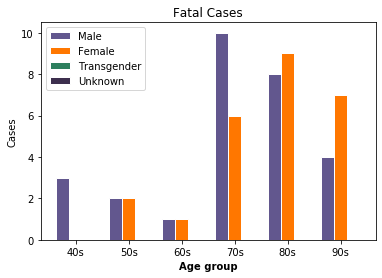

In [9]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [3,2,1,10,8,4]
bars2 = [0,2,1,6,9,7]
bars3=[0,0,0,0,0,0]
bars4=[0,0,0,0,0,0]


 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


# Make the plot
plt.bar(r1, bars1, color='#62578e', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, bars2, color='#ff7700', width=barWidth, edgecolor='white', label='Female')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Transgender')
plt.bar(r3, bars4, color='#3d2f4e', width=barWidth, edgecolor='white', label='Unknown')

# Add xticks on the middle of the group bars
plt.xlabel('Age group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['40s', '50s', '60s', '70s', '80s','90s'])
plt.title("Fatal Cases")
# Create legend & Show graphic
plt.ylabel("Cases")
plt.legend()
plt.show()



This bar graphs illustrates the proportion of fatal cases in respect to age group, 6 out of 10 age groups have suffered from at least 1 fatal case. These groups are:

- 40s
- 50s
- 60s
- 70s
- 80s
- 90s

The age group with the highest number of cases is 80s with 17 cases, followed by 70s with 16 cases, then 60s has the least amount of cases with a count of 2, with the There are no fatal cases for transgender and unknown groups.


50s        529
40s        466
60s        459
30s        438
20s        388
70s        257
80s        131
<20         68
90s         55
Unknown      2
Name: Age_Group, dtype: int64
80s    17
70s    16
90s    11
50s     4
40s     3
60s     2
Name: Age_Group, dtype: int64


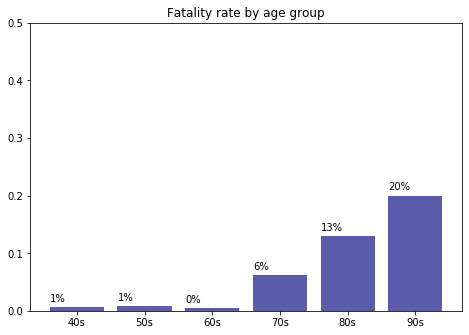

In [10]:
print()
t = c19.loc[c19['RESOLVED'] == "Fatal"]
print(c19.Age_Group.value_counts())
a=[68,388,438,466,529,459,257,131,55,2]
o=['40s','50s','60s','70s','80s','90s']
per = [0.006437768240343348, 0.007561436672967864, 0.004357298474945534, 0.0622568093385214, 0.1297709923664122, 0.2]
#[0,0,0,0.006437768240343348, 0.007561436672967864, 0.004357298474945534, 0.0622568093385214, 0.1297709923664122, 0.2,0]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

print(t.Age_Group.value_counts())
ax.bar(o,per,color=(0.2, 0.2, 0.6, 0.8))
ax.set_title("Fatality rate by age group")
ax.set_ylim([0,0.5])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.00%}'.format(height), (x, y + height + 0.01))

The 90s age group sees the highest fatality rate, with 1 in 5 reported cases died. The 80s group sees the second highest, but is only around half that of the 90s, at around 13%. The 70s follows, with less than half that of the 80s, at 6%. All the other groups suffer around 1% or less.

From the 2 previous graphs on Covid-19 fatalities, we can see a significant difference between Covid-19 and 2003 SARS, despite being related. The majority of death from the 2003 SARS epidemic was between 25 to 50, with the older age group suffered less severely. Covid-19, on the other hand, sees the majority of its victim being in the older age group.

In [11]:
agec = c19["Age_Group"].value_counts() #2793
print(agec)
print(c19.Age_Group.unique())
agelevel = ["50s", "40s",  "60s",  "30s",  "20s", "70s",
            "80s", r"<20", "90s",  "Unknown" ]

genderc = c19["CLIENT_GENDER"].value_counts()
print(genderc)
print(c19.CLIENT_GENDER.unique())

caseinfo = c19["CASE_ACQUISITIONINFO"].value_counts()
print(caseinfo)
print(c19.CASE_ACQUISITIONINFO.unique())

city = c19["Reporting_PHU_City"].value_counts() #2793
print(city)
print(c19.Reporting_PHU_City.unique())

r = c19['RESOLVED'].value_counts()
print(r)
print(c19.RESOLVED.unique())

50s        529
40s        466
60s        459
30s        438
20s        388
70s        257
80s        131
<20         68
90s         55
Unknown      2
Name: Age_Group, dtype: int64
['20s' '30s' '40s' '50s' '60s' '70s' '80s' '90s' '<20' 'Unknown']
FEMALE         1421
MALE           1355
UNKNOWN          16
TRANSGENDER       1
Name: CLIENT_GENDER, dtype: int64
['FEMALE' 'MALE' 'UNKNOWN' 'TRANSGENDER']
Information pending            1395
Travel-Related                  625
Neither                         463
Contact of a confirmed case     310
Name: CASE_ACQUISITIONINFO, dtype: int64
['Information pending' 'Neither' 'Contact of a confirmed case'
 'Travel-Related']
Toronto             683
Mississauga         341
Newmarket           319
Ottawa              248
Whitby              155
Hamilton            114
Waterloo            112
Oakville             79
London               74
Windsor              71
Thorold              66
Port Hope            64
Barrie               61
Point Edward       

The above output is an example of the raw data, at first glance we can see that:
- the age group variable has 10 unique values.
- for gender, we have 4 unique values. 
- and 4 unique values for acquisition info.
We will keep these in mind as we go along with our visualizations. Since all of these are qualitative we can only visualize proportions and frequencies.

From the raw data alone, we can observe that people in their 50's had the maximum number of occurrences. Which was followed by persons in their 40's, 60's, and next were people in their 20's, 70's and 80's. As stated earlier the age group of less than 20 and greater than 90 were effected the least by the spread.

The frequency of transmission types was
- 1395 were unknown 
- 625 were travel-related 
- 463 for neither contact of a confirmed case and travel
- 310 for a contact of a confirmed case

The data used for distinguishing between gender was:
- 1421 females
- 1355 males
- 16 unknown
- 1 transgender

The frequency of status of client is:
- 1909 unresolved
- 831 resolved
- 53 fatal

The count for gender is:
- 1421 Females
- 1355 Males
- 16 Unknown
- 1 Transgender 


2020-03-20    193
2020-03-23    164
2020-03-26    153
2020-03-18    149
2020-03-27    144
2020-03-25    143
2020-03-17    140
2020-03-24    137
2020-03-21    137
2020-03-19    134
2020-03-16    125
2020-03-28    123
2020-03-22    122
2020-03-30    102
2020-03-15     88
2020-03-14     81
2020-03-12     78
2020-03-29     76
2020-03-13     71
2020-03-11     67
2020-03-10     63
2020-04-01     58
2020-03-31     53
2020-03-09     47
2020-03-08     30
2020-03-07     20
2020-03-06     18
2020-03-05     13
2020-03-02     10
2020-03-03     10
2020-03-04      6
2020-03-01      4
2020-02-28      4
2020-02-20      4
2020-02-29      3
2020-02-23      3
2020-02-26      3
2020-02-22      2
2020-02-14      2
2020-02-24      2
2020-02-25      2
2020-02-16      1
2020-01-24      1
2020-01-25      1
2020-01-21      1
2020-02-21      1
2020-02-15      1
2020-01-22      1
2020-02-27      1
2020-02-05      1
Name: ACCURATE_EPISODE_DATE, dtype: int64


Text(0.5, 1.0, 'Number of new cases each day')

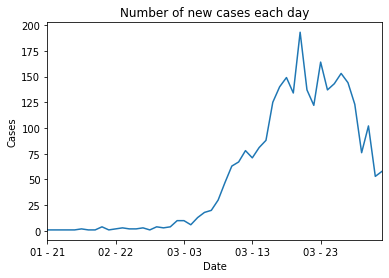

In [12]:
print(c19.ACCURATE_EPISODE_DATE.value_counts())
c19['ACCURATE_EPISODE_DATE'] =  pd.to_datetime(c19['ACCURATE_EPISODE_DATE'] )
c19['dm'] = c19['ACCURATE_EPISODE_DATE'].dt.strftime('%m - %d')
if('Count' in c19.columns):
    c19 = c19.drop('Count', 1)
    
c19 = c19.groupby(c19['dm']).size().reset_index(name='Count')
c19.plot(x='dm', y='Count',legend=None,kind='line')

plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Number of new cases each day")


The number of new cases does not increase on a linear model but rather, on a exponential model. From the late January 21st to early March 3rd, Ontario sees fewer than 50 cases. 15 days later, on March 20th, there were almost quadruple that in one day. March 20th was the day with highest number of new cases in the dataset. Afterward, the speed seems to drop quickly over a period of 3 weeks. This might be attributed to the government's decision to shutdown school in mid-March and decision to shutdown non-essetial business in late-March.

This graph demonstrate an important fact that many people seem to miss, shown by the media's dismissal of Covid-19 in January and February: diseases grow exponentially, not linearly. It may be 1 cases today, but given a few days, this number will grow out of control.

In [15]:
c19 = pd.read_csv("conposcovidloc.csv")

import plotly.express as px
a = c19[['CLIENT_GENDER','CASE_ACQUISITIONINFO','Age_Group']]
fig = px.parallel_categories(a)
fig

The parallel set visualization supports all of our previous observations. The virus doesn't discriminate for gender and all of us as equally susceptible to it. A majority of the test cases are unaware of how they caught the virus and lastly, persons under the age of 20 and above the age of 90 have had the smallest number of cases of COVID-19.

# Conclusion

Firstly, Toronto has the highest number of cases. This is consistent with the fact that Toronto is a global transportation hub, has a high population density and attract global travelers.

Secondly, despite having the highest numbers of cases, by the time this dataset was consolidated, the age groups from 20s to 50s see no deaths. The older age groups, especially from 70s to 90s, see a significantly higher fatality rate, with the 90s group seeing almost 1 in 5 reported cases die.

Thirdly, and most importantly, this demonstrates a lesson that has been learned over and over again in human history: diseases grow exponentially, not linearly. The number of cases can grow greatly in a very short period of time and overwhelm unprepared medical facilities.

Overall, by visualizing different relationships between variables of Coronavirus cases in Ontario, we have come to an understanding that the virus is not biased to any gender however statistically people above the age of 20 and below the age of 90 are more prone to it. 
 